In [8]:
# Behavourial cloning
#!git clone https://github.com/Calle-Lundqvist/Track
!git clone https://github.com/rslim087a/track


fatal: destination path 'track' already exists and is not an empty directory.


In [7]:
!ls Track

ls: cannot access 'Track': No such file or directory


In [3]:
!pip3 install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa


In [5]:
!pip show keras

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: keras-vis, tensorflow


In [9]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1) # Makes it so whole string is shown

data.head()

<ipython-input-9-f0b7473ffae6>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # Makes it so whole string is shown


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [10]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


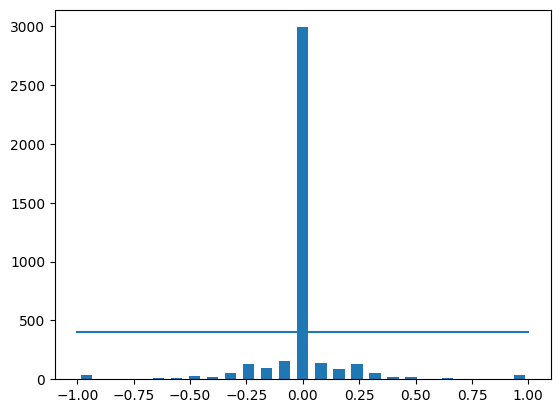

In [11]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.show()

In [12]:
remove_list = []

for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j + 1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('Total data: ', len(data))
print('Removed: ', len(remove_list))

data.drop(data.index[remove_list], inplace = True)

print('Remaining: ', len(data))

Total data:  4053
Removed:  2590
Remaining:  1463


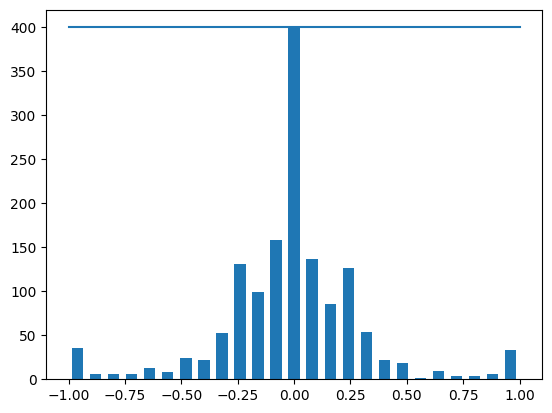

In [13]:
hist, _ = np.histogram(data['steering'], (num_bins))

plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.show()

In [14]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []

  for i in range(len(df)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]

    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)

  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 1)

print('Training samples: {}\nValid samples: {}'.format(len(X_train), len(X_valid)))

Training samples: 1170
Valid samples: 293


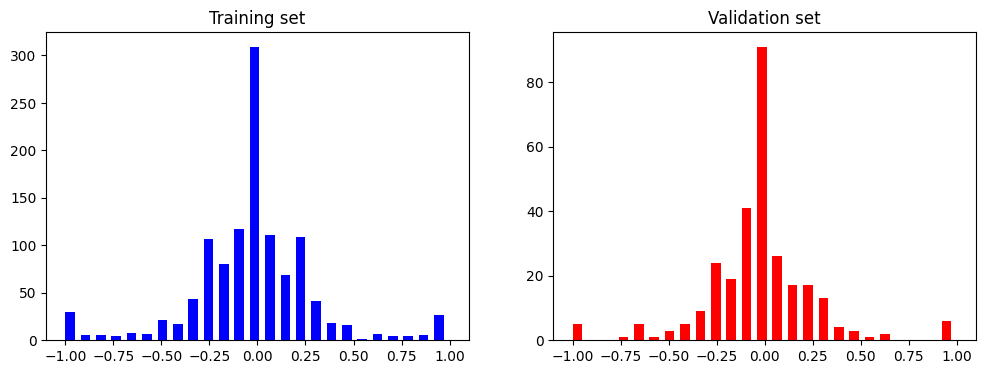

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0].hist(y_train, bins=num_bins, width = 0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width = 0.05, color='red')
axes[1].set_title('Validation set')

plt.show()

In [17]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3)) # zoom up to 30 percent into image
  image = zoom.augment_image(image)
  return image



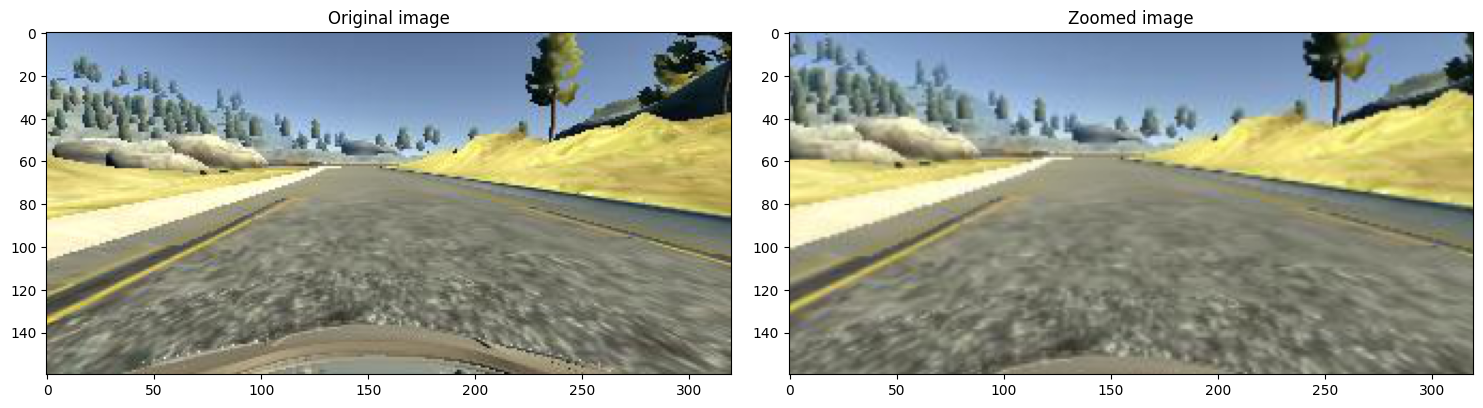

In [18]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)


fig, axs = plt.subplots(1, 2, figsize=(15,10))

fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original image")

axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed image")

plt.show()

In [19]:
def pan(image):
  pan = iaa.Affine(translate_percent= { "x" : (-0.1, 0.1), "y" : (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

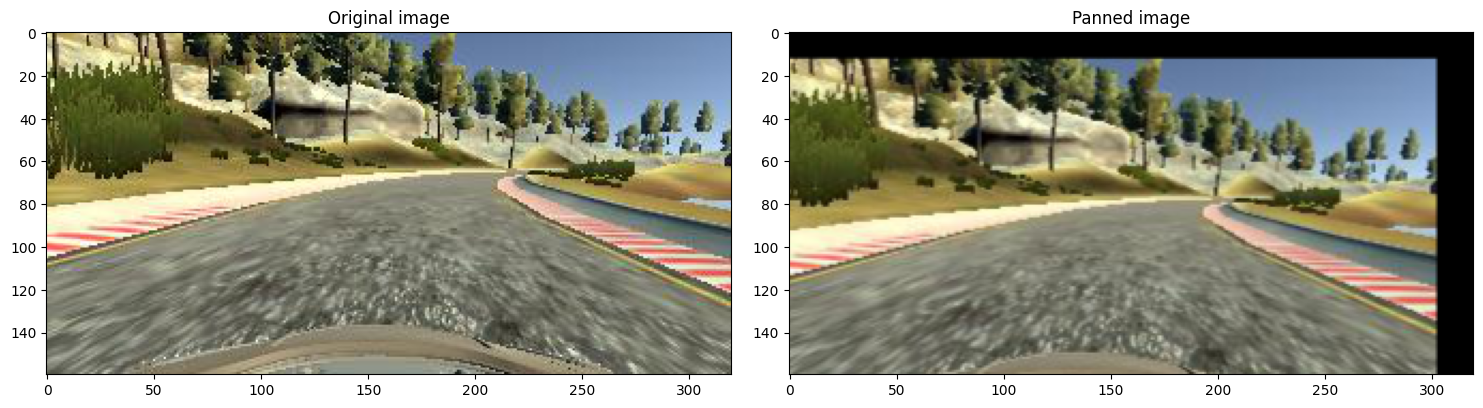

In [20]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)


fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original image")
axs[1].imshow(panned_image)
axs[1].set_title("Panned image")
plt.show()

In [21]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

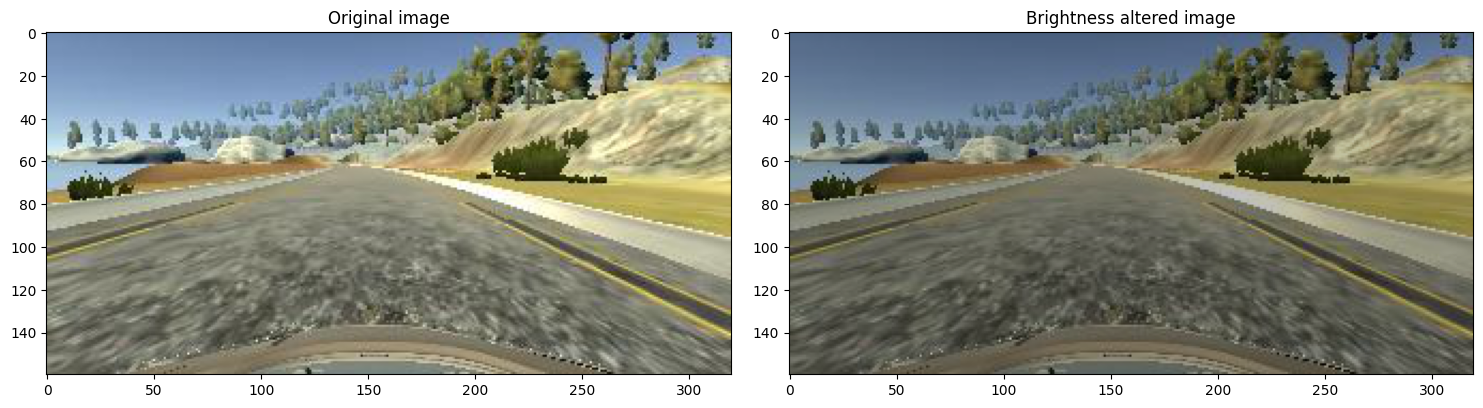

In [22]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)


fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original image")
axs[1].imshow(brightness_altered_image)
axs[1].set_title("Brightness altered image")
plt.show()

In [23]:
def img_random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle


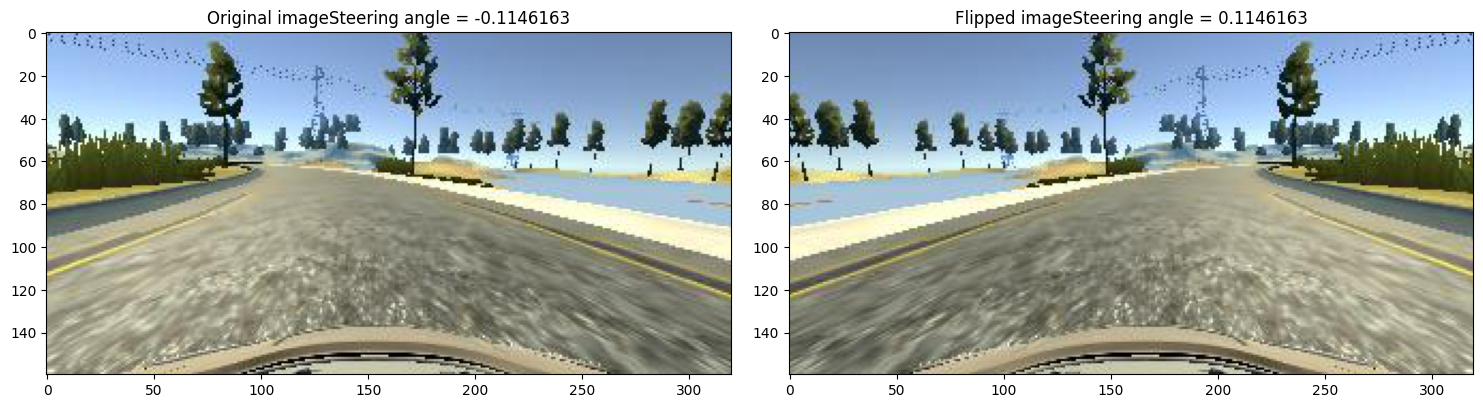

In [24]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)


fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original image" + "Steering angle = " + str(steering_angle))
axs[1].imshow(flipped_image)
axs[1].set_title("Flipped image" + "Steering angle = " + str(flipped_steering_angle))
plt.show()

In [25]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)

  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)

  return image, steering_angle

In [26]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(nrow):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]


  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  steerings[randnum] = steering

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented image")

Output hidden; open in https://colab.research.google.com to view.

In [27]:
def img_preprocess(img):
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

In [ ]:
#image = image_paths[10]
#original_image = mpimg.imread(image)
#preprocessed_image = img_preprocess(image)


#fig, axs = plt.subplots(1, 2, figsize=(15,10))
#fig.tight_layout()
#axs[0].imshow(original_image)
#axs[0].set_title('Original image')
#axs[1].imshow(preprocessed_image)
#axs[1].set_title('Preprocessed image')

#plt.show()

In [28]:
def batch_generator(image_paths, steering_angles, batch_size, istraining):
  #yield saves all values that were in this function last time we used the function

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_angles[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_angles[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)

    yield (np.asarray(batch_img), np.asarray(batch_steering))




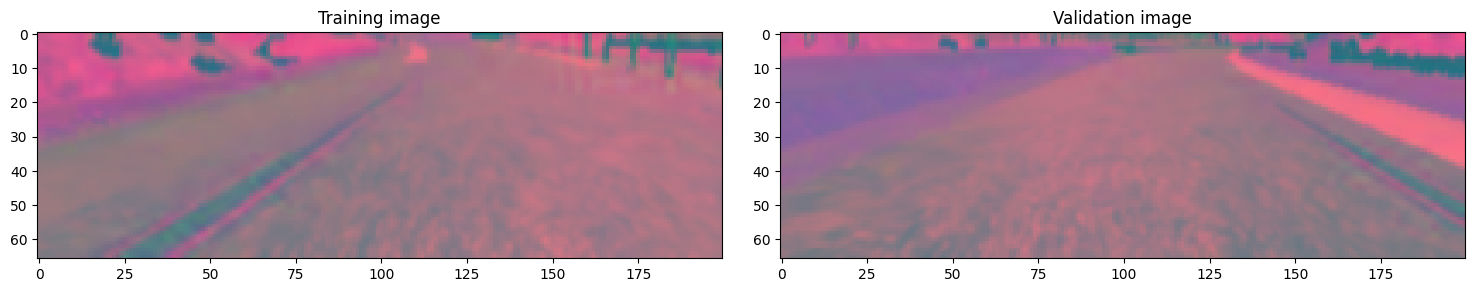

In [29]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))


fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(x_train_gen[0])
axs[0].set_title("Training image")
axs[1].imshow(x_valid_gen[0])
axs[1].set_title("Validation image")
plt.show()

In [32]:
# Will now use Nvidia model!
# Problem is regression type 

def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, (5, 5), strides = (2, 2), input_shape = (66, 200, 3), activation = 'elu'))
  model.add(Convolution2D(36, (5, 5), strides = (2, 2), activation = 'elu'))
  model.add(Convolution2D(48, (5, 5), strides = (2, 2), activation = 'elu'))
  model.add(Convolution2D(64, (3, 3), activation = 'elu'))
  model.add(Convolution2D(64, (3, 3), activation = 'elu'))
  #model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1))

  optimizer = Adam(lr = 1e-3)
  model.compile(loss = 'mse', optimizer = optimizer)

  return model




In [33]:
model = nvidia_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [34]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                              steps_per_epoch = 300, epochs = 10,
                              validation_data = batch_generator(X_valid, y_valid, 100, 0),
                              validation_steps=200, verbose = 1, shuffle = 1)




<ipython-input-34-4b5f209565f1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),


Epoch 1/10
300/300 [==============================] - 162s 514ms/step - loss: 0.0988 - val_loss: 0.0516
Epoch 2/10
300/300 [==============================] - 155s 518ms/step - loss: 0.0610 - val_loss: 0.0442
Epoch 3/10
300/300 [==============================] - 153s 511ms/step - loss: 0.0531 - val_loss: 0.0357
Epoch 4/10
300/300 [==============================] - 150s 502ms/step - loss: 0.0451 - val_loss: 0.0395
Epoch 5/10
300/300 [==============================] - 148s 496ms/step - loss: 0.0418 - val_loss: 0.0291
Epoch 6/10
300/300 [==============================] - 149s 498ms/step - loss: 0.0396 - val_loss: 0.0303
Epoch 7/10
300/300 [==============================] - 153s 512ms/step - loss: 0.0374 - val_loss: 0.0298
Epoch 8/10
300/300 [==============================] - 150s 502ms/step - loss: 0.0350 - val_loss: 0.0256
Epoch 9/10
300/300 [==============================] - 147s 493ms/step - loss: 0.0332 - val_loss: 0.0225
Epoch 10/10
300/300 [==============================] - 151s 506m

Text(0.5, 0, 'Epoch')

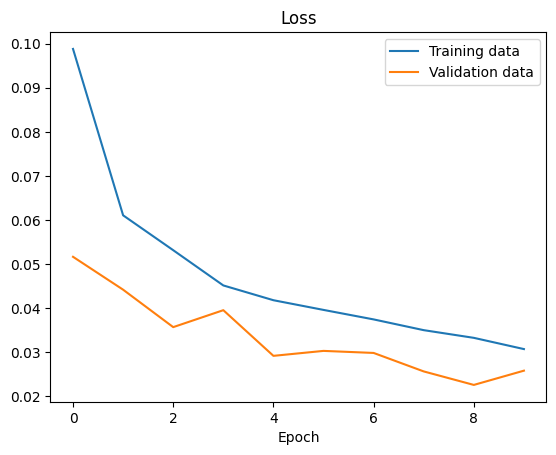

In [35]:
# We saw "dying relu" problem and changed to ELU activation functions instead!

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training data', 'Validation data'])
plt.title('Loss')
plt.xlabel('Epoch')

In [36]:
model.save('model.h5')

In [37]:
from google.colab import files

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>